In [1]:
import pandas as pd
from plotnine import *

# UDG-half libraries

#### 3p End

In [2]:
udg_half_3p = pd.read_csv("data/udg_half_multiqc_damageprofiler_3p.tsv", sep="\t")

In [3]:
udg_half_3p["Nucleotide position from 3'"] = (udg_half_3p["Nucleotide position from 3'"]) * -1

In [4]:
udg_half_3p = udg_half_3p.melt(id_vars="Nucleotide position from 3'", var_name="sample", value_name="value")

In [5]:
udg_half_3p["end"] = ["G>A_3p"] * udg_half_3p.shape[0]

In [6]:
udg_half_3p.rename(columns={"Nucleotide position from 3'":"position"}, inplace=True)

#### 5p End

In [7]:
udg_half_5p = pd.read_csv("data/udg_half_multiqc_damageprofiler_5p.tsv", sep="\t")

In [8]:
udg_half_5p.head()

,Nucleotide position from 5',AHP001_Canis_familiaris,AHP001_Homo_sapiens,AHP002_Canis_familiaris,AHP002_Homo_sapiens,AHP003_Canis_familiaris,AHP003_Homo_sapiens,AHP004_Canis_familiaris,AHP004_Homo_sapiens,BRF001_A0101_SG1_1_S0_Canis_familiaris,...,DRL001_A0101_SG1_1_S0_Canis_familiaris,DRL001_A0101_SG1_1_S0_Homo_sapiens,ECO004_D0101_SG1_1_S0_Canis_familiaris,ECO004_D0101_SG1_1_S0_Homo_sapiens,LEI010_A0101_SG1_1_S0_Canis_familiaris,LEI010_A0101_SG1_1_S0_Homo_sapiens,MLP001_A0101_SG1_1_S0_Canis_familiaris,MLP001_A0101_SG1_1_S0_Homo_sapiens,YRK001_A0101_SG1_1_S0_Canis_familiaris,YRK001_A0101_SG1_1_S0_Homo_sapiens
0,1,0.853883,0.777143,0.857097,0.863787,0.867605,0.830065,0.818792,0.600000,0.636364,...,0.5,0.615385,0.583333,0.605263,0.530973,0.587591,0.570652,0.736142,0.686757,0.632787
1,2,0.159892,0.250000,0.156087,0.223881,0.154661,0.185484,0.175676,0.136364,0.076923,...,0.2,0.300000,0.000000,0.090909,0.166667,0.092199,0.016260,0.075556,0.138559,0.107914
2,3,0.093533,0.132530,0.087108,0.110345,0.080137,0.174825,0.151899,0.115385,0.150000,...,0.0,0.111111,0.153846,0.230769,0.333333,0.076142,0.102362,0.164179,0.131794,0.134615
3,4,0.063901,0.095238,0.049919,0.032258,0.056995,0.075188,0.062500,0.033333,0.062500,...,0.0,0.000000,0.125000,0.090909,0.141414,0.194286,0.127273,0.009852,0.109229,0.125000
4,5,0.040046,0.065217,0.053516,0.071429,0.040804,0.065476,0.011236,0.100000,0.076923,...,0.0,0.181818,0.187500,0.142857,0.000000,0.052288,0.071942,0.177419,0.089141,0.165829


In [9]:
udg_half_5p = udg_half_5p.melt(id_vars="Nucleotide position from 5'", var_name="sample", value_name="value")

In [10]:
udg_half_5p['end'] = ["C>T_5p"] * udg_half_5p.shape[0]

In [11]:
udg_half_5p.rename(columns={"Nucleotide position from 5'":"position"}, inplace=True)

In [12]:
udg_half=udg_half_3p.append(udg_half_5p)

In [13]:
species_lst = udg_half['sample'].str.rsplit("_",n=2, expand=True)
species = species_lst[1].str.cat(species_lst[2], sep=" ")

In [14]:
udg_half['sample'] = species_lst[0]
udg_half['species'] = species

/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:720: PlotnineWarning: Filename: results/udg_half.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:735: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  fig.savefig(filename, **fig_kwargs)


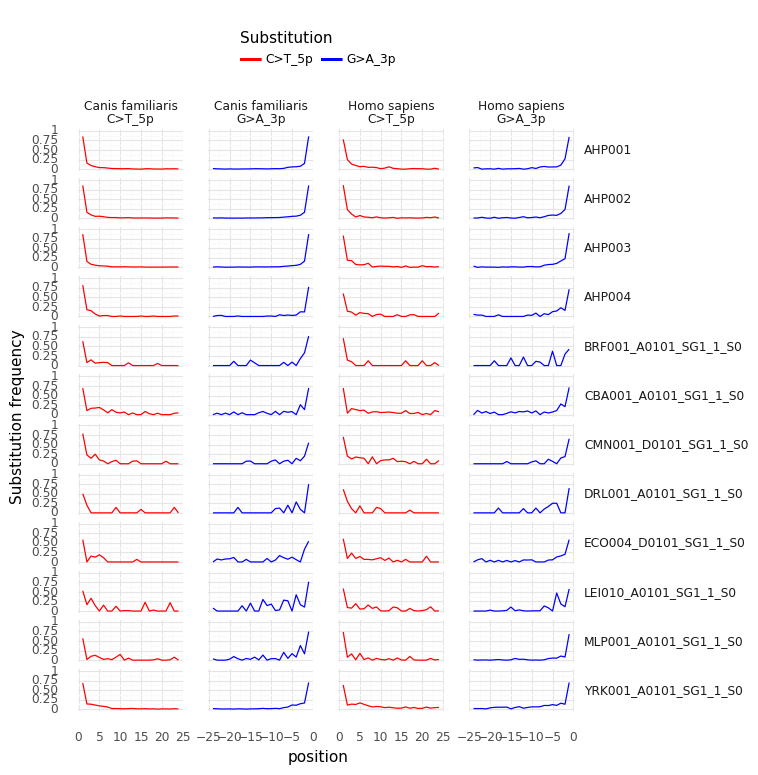

<ggplot: (-9223363244640007010)>

In [15]:
g = ggplot(udg_half, aes(x="position",y="value", color="end")) 
g += geom_line() 
g += facet_grid("sample ~ species + end", scales='free_x')
g += labs(y="Substitution frequency")
g += scale_color_manual(name="Substitution", values={"C>T_5p":"red", "G>A_3p":"blue"})
g += theme_minimal()
g += theme(strip_text_y = element_text(angle=0, ha="left"), aspect_ratio=0.4, legend_position="top", panel_spacing_x = 0.25)
g += coord_cartesian(ylim=[0,1])
g.save("results/udg_half.png", dpi=300)
g

## Non UDG-half libraries

#### 3p

In [16]:
non_udg_3p = pd.read_csv("data/non_udg_multiqc_damageprofiler_3p.tsv", sep="\t")
non_udg_3p["Nucleotide position from 3'"] = (non_udg_3p["Nucleotide position from 3'"]) * -1
non_udg_3p = non_udg_3p.melt(id_vars="Nucleotide position from 3'", var_name="sample", value_name="value")
non_udg_3p["end"] = ["G>A_3p"] * non_udg_3p.shape[0]
non_udg_3p.rename(columns = {"Nucleotide position from 3'":"position"}, inplace=True)

#### 5p

In [17]:
non_udg_5p = pd.read_csv("data/non_udg_multiqc_damageprofiler_5p.tsv", sep="\t")

In [18]:
non_udg_5p= non_udg_5p.melt(id_vars="Nucleotide position from 5'", var_name="sample", value_name="value")
non_udg_5p["end"] = ["C>T_5p"] * non_udg_5p.shape[0]
non_udg_5p.rename(columns = {"Nucleotide position from 5'":"position"}, inplace=True)

In [19]:
non_udg = non_udg_3p.append(non_udg_5p)

In [20]:
species_lst = non_udg['sample'].str.rsplit("_",n=2, expand=True)
species = species_lst[1].str.cat(species_lst[2], sep=" ")

In [21]:
non_udg['sample'] = species_lst[0]
non_udg['species'] = species

/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:720: PlotnineWarning: Filename: results/non_udg.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:735: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  fig.savefig(filename, **fig_kwargs)


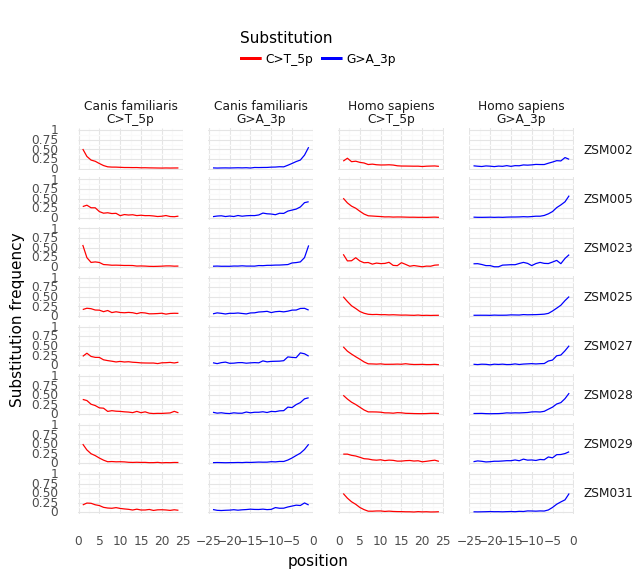

<ggplot: (-9223363244736379739)>

In [22]:
g = ggplot(non_udg, aes(x="position",y="value", color="end")) 
g += geom_line()
g += facet_grid("sample ~ species + end", scales='free_x')
g += labs(y="Substitution frequency")
g += scale_color_manual(name="Substitution", values={"C>T_5p":"red", "G>A_3p":"blue"})
g += theme_minimal()
g += theme(strip_text_y = element_text(angle=0, ha="left"), aspect_ratio=0.4, legend_position="top", panel_spacing_x = 0.25)
g += coord_cartesian(ylim=[0,1])
g.save("results/non_udg.png", dpi=300)
g